In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
from warnings import filterwarnings
filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand-complete/city hotel.csv
/kaggle/input/hotel-booking-demand-complete/resort hotel.csv
/kaggle/input/hotel-booking-demand-complete/hotel_booking.csv


In [4]:
df = pd.read_csv("../hotel_booking.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df.shape

(119390, 32)

## DATA CLEANING

In [6]:
df.isna().sum() # get missing values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# Fill the missing values with '0' for "Agent" and "Company"
# because if no agency is given it can be possible that the booking has been done without one,
# if no company specified, it mean booking is done privately

In [8]:
# deal with missing values
def data_clean(df):
    df.fillna(0, inplace=True)
    print(df.isnull().sum())

data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
list = ['adults', 'children', 'babies']

for i in list:
    print('{} has unique values as {}'.format(i, df[i].unique()))

adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]


In [11]:
# wrong entries where adults, childern and babies are '0' at a time
filter = (df['children']==0) & (df['adults']==0) & (df['babies']==0) 
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [12]:
# data after cleaning
data = df[~filter] # negation of filter i.e., data without above data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


## Analysing home country of guests

In [13]:
country_wise = data[data['is_canceled'] == 0]['country'].value_counts()
country_wise

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
DJI        1
AIA        1
ZMB        1
PLW        1
SMR        1
Name: country, Length: 166, dtype: int64

In [14]:
# make a dataframe of above data
country_wise_df = country_wise.reset_index()
country_wise_df.columns = ['country', 'no. of guests']
country_wise_df

,country,no. of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,DJI,1
162,AIA,1
163,ZMB,1
164,PLW,1


In [15]:
import folium
from folium.plugins import HeatMap
basemap = folium.Map()

import plotly.express as px
map_guests = px.choropleth(country_wise_df,
             locations=country_wise_df['country'],
             color=country_wise_df['no. of guests'],
             hover_name=country_wise_df['country'],
             title='Home country of guests')
map_guests.show()

In [16]:
data2 = data[data['is_canceled']==0]
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

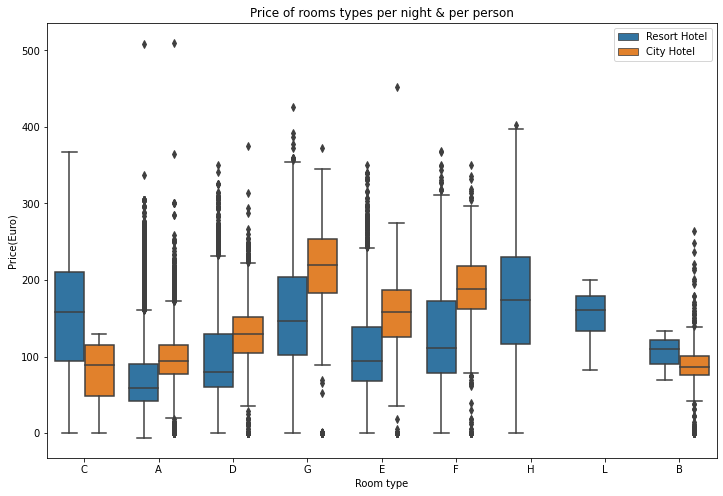

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2)
plt.title('Price of rooms types per night & per person')
plt.xlabel('Room type')
plt.ylabel('Price(Euro)')
plt.legend()
plt.show()

The best distribution of price with City hotel is with "G" room type and with Resort hotel is with "H" and "C"

## Analysing prices of hotel across year for Resort Hotel and City Hotel  
(how much price varies over year?)

In [18]:
data_resort = data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [19]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [20]:
resort_hotel_df = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel_df

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [21]:
city_hotel_df = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel_df

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [22]:
# merge both data 
final_df = resort_hotel_df.merge(city_hotel_df, on='arrival_date_month')
final_df.columns=['month', 'price_for_resort_hotel', 'price_for_city_hotel'] # rename columns
final_df

,month,price_for_resort_hotel,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [23]:
# python modules for sorting the month, weekday etc
!pip install sort_dataframeby_monthorweek
!pip install sorted-months-weekdays

In [24]:
import sort_dataframeby_monthorweek as sd

def sort_data(df, column):
    return sd.Sort_Dataframeby_Month(df, column)

In [25]:
final_df = sort_data(final_df, 'month')
final_df

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [26]:
final_df.columns

Index(['month', 'price_for_resort_hotel', 'price_for_city_hotel'], dtype='object')

In [27]:
# line plot
px.line(final_df, x='month', y=['price_for_resort_hotel', 'price_for_city_hotel'], 
        title='Room price per night over the months')

## Analysing the demand of hotels  
(highest number of guests in which season?)

In [28]:
rush_resort_df = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort_df.columns = ['month', 'no. of guests']
rush_resort_df

,month,no. of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [29]:
rush_city_df = data_city['arrival_date_month'].value_counts().reset_index()
rush_city_df.columns = ['month', 'no. of guests']
rush_city_df

,month,no. of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [30]:
final_rush_df = rush_resort_df.merge(rush_city_df, on='month')
final_rush_df.columns = ['month', 'no. of guests in resort', 'no. of guests in city hotel']
final_rush_df

,month,no. of guests in resort,no. of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [31]:
final_rush_df = sort_data(final_rush_df, 'month')
final_rush_df

,month,no. of guests in resort,no. of guests in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [32]:
# line plot
px.line(final_rush_df, x='month', y=['no. of guests in resort', 'no. of guests in city hotel'], 
        title='Total number of guests per months')

## Select important features using ML (correlation matrix)

In [33]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


eg. "is_canceled" and "lead_time" have a correlation of 0.29, i.e., if lead_time value increases, there is a probability of 29% that is_canceled also increases.

In [34]:
# find the correlation with "is_canceled" because it is depended feature 
# (how all other variable are going to be depended on is_canceled?)

correlation = data.corr()['is_canceled']
correlation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [35]:
correlation.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [36]:
data.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

- when booking is not cancelled and reservation status is check-out = 75011 guests
- when booking is going to be cancelled when reservation is canceled = 42993 guest

In [37]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [38]:
# exclude numerical columns which are not going to contribute much
num_not = ['days_in_waiting_list', 'arrival_date_year']

In [39]:
# get numerical features
num_features = [col for col in data.columns if data[col].dtype != 'O' and col not in num_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [40]:
# exclude the categorical features that are not going to contribute much
cat_not = ['arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country', 'days_in_waiting_list']

In [41]:
# get catrgorical features
cat_features = [col for col in data.columns if data[col].dtype == 'O' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

## Extract derived features from data

In [42]:
data_cat = data[cat_features]
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


In [43]:
data_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [44]:
data_cat['reservation_status_date'] = pd.to_datetime(data_cat['reservation_status_date'])

In [45]:
# derived features
data_cat['year'] = data_cat['reservation_status_date'].dt.year
data_cat['month'] = data_cat['reservation_status_date'].dt.month
data_cat['day'] = data_cat['reservation_status_date'].dt.day

data_cat['cancellation'] = data['is_canceled']

In [46]:
# drop a feature because derived features already carries its information
data_cat.drop('reservation_status_date', axis=1, inplace=True) # drop vertically and update dataframe

In [47]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


## Handling Categorical features (Mean Encoding)

In [48]:
data_cat['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [49]:
cols = data_cat.columns[0:8] # each columns except 'cancellation'

In [50]:
# mean encoding, for example
data_cat.groupby(['hotel'])['cancellation'].mean() # it will replace the resort hotel with value '0.277674'

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64

In [51]:
#  Each categorical feature has its value which will be used by ML model
# and convert into dictionary so it can be easily mapped

for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean().to_dict())
    print('\n')

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}


{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.3740638923120675, 'Undefined': 0.2446535500427716}


{'Aviation': 0.22127659574468084, 'Complementary': 0.12225274725274725, 'Corporate': 0.18761832639151838, 'Direct': 0.15371165156572883, 'Groups': 0.6110858471022181, 'Offline TA/TO': 0.3433132081713671, 'Online TA': 0.3675897035881435, 'Undefined': 1.0}


{'Corporate': 0.22056833558863329, 'Direct': 0.1748682499486688, 'GDS': 0.19170984455958548, 'TA/TO': 0.41059846547314577, 'Undefined': 0.8}


{'A': 0.391566

In [52]:
# mapping the data into dataframe
for col in cols:
    dict = data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col] = data_cat[col].map(dict)

In [53]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [54]:
dataframe = pd.concat([data_cat, data[num_features]], axis=1)

In [55]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day', 'cancellation', 'is_canceled',
       'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [56]:
dataframe.drop('cancellation', axis=1, inplace=True) # we had both 'cancellation' and 'is_canceled'
dataframe

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,...,0,0,0,0,3,0.0,0.0,0.00,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,...,0,0,0,0,4,0.0,0.0,0.00,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,...,0,0,0,0,0,0.0,0.0,75.00,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,...,0,0,0,0,0,304.0,0.0,75.00,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,...,0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,2017,9,...,0,0,0,0,0,394.0,0.0,96.14,0,0
119386,0.417859,0.377823,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,2017,9,...,0,0,0,0,0,9.0,0.0,225.43,0,2
119387,0.417859,0.377823,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,2017,9,...,0,0,0,0,0,9.0,0.0,157.71,0,4
119388,0.417859,0.377823,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2017,9,...,0,0,0,0,0,89.0,0.0,104.40,0,0


## Handling Outliers

In [57]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,...,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,...,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,...,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,...,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,...,0,0,0,0,0,240.0,0.0,98.0,0,1


In [58]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

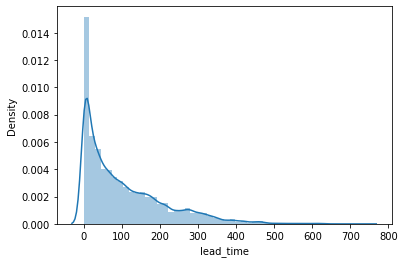

In [59]:
# for lead_time
sns.distplot(dataframe['lead_time'])

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

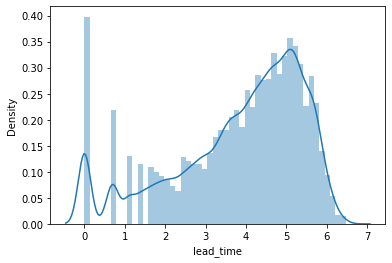

In [60]:
handle_outlier('lead_time')
sns.distplot(dataframe['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

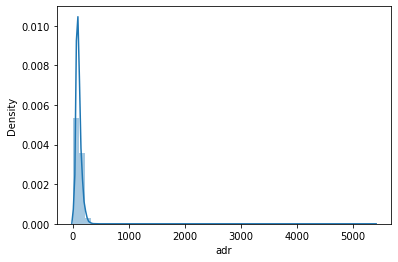

In [61]:
# for adr
sns.distplot(dataframe['adr'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

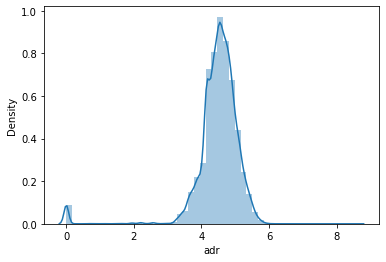

In [62]:
handle_outlier('adr')
sns.distplot(dataframe['adr'].dropna())

## Applying techniques of Feature Importance
To select most important features for ML model

In [63]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [64]:
dataframe.dropna(inplace=True) # drop and update the dataframe

In [116]:
x = dataframe.drop('is_canceled', axis=1) # independent features
y = dataframe['is_canceled'] # dependent feature

In [117]:
x.shape

(119209, 28)

In [118]:
y.shape

(119209,)

In [119]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [120]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [121]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [122]:
feature_sel_model.get_support() # if a feature is going to contribute or not

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True])

In [123]:
cols = x.columns
selected_features = cols[feature_sel_model.get_support()] # using as a filter, feature corresponding to True will be filtered

print('total features: {}'.format(x.shape[1]))
print('selected features: {}'.format(len(selected_features)))

total features: 28
selected features: 14


In [124]:
# update x
x = x[selected_features]

In [125]:
x.shape

(119209, 14)

## Apply Logistic Regression

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
logreg = LogisticRegression(solver='liblinear')

logreg.fit(X_train,y_train)

In [128]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

In [131]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

## Apply Cross Validation

In [133]:
from sklearn.model_selection import cross_val_score

In [135]:
score = cross_val_score(logreg, x, y, cv=10)
score.mean()

## Apply multiple ML algorithms

In [138]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [149]:
models = []

models.append(('LogisticRegression', LogisticRegression(solver='liblinear')))
models.append(('Naive bayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [150]:
models

[('LogisticRegression', LogisticRegression(solver='liblinear')),
 ('Naive bayes', GaussianNB()),
 ('RandomForest', RandomForestClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier())]

In [151]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    print(confusion_matrix(predictions, y_test))
    
    print(accuracy_score(predictions, y_test))
    print('\n')

LogisticRegression
[[18058  5331]
 [  626  5788]]


0.8001207932087374


Naive bayes
[[ 8288  1138]
 [10396  9981]]


0.6129919806730866


RandomForest
[[18574  1177]
 [  110  9942]]


0.9568164278763883


Decision Tree
[[17816   783]
 [  868 10336]]


0.9446028923262759


KNN
[[18531  1397]
 [  153  9722]]


0.9479918129047411


